In [89]:
import tweepy
from twitter_authentication import CONSUMER_KEY, CONSUMER_SECRET, ACCESS_TOKEN, ACCESS_TOKEN_SECRET

auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
auth.set_access_token(ACCESS_TOKEN, ACCESS_TOKEN_SECRET)



Use the search api to find Tweets that contain a phrase.

In [118]:
api = tweepy.API(auth)
import json
import csv

public_tweets = api.search("text: COVID -filter:retweets", count=100, tweet_mode="extended")

tweets_list = [tweet._json for tweet in public_tweets]

with open('tweets.json', 'w') as out:
    json.dump(tweets_list,out)

# tweets_list = [tweet for tweet in public_tweets]

# print(tweets_list)

# for tweet in public_tweets:
#     print(tweet._json)

# # json_data = json.loads(tweet._json)
# # file.write(str(json_data))

# # Open/create a file to append data to
csvFile = open('result.csv', 'w')

#Use csv writer
csvWriter = csv.writer(csvFile)

# for tweet in tweepy.Cursor(api.search,
#                            q = "text: Animal Crossing -filter:retweets", count = 100) .items():
for tweet in tweets_list:
#     print(tweet["text"])
    # Write a row to the CSV file. I use encode UTF-8
    csvWriter.writerow([tweet["full_text"].encode('utf-8')])
#     print (tweet.created_at, tweet.text)
csvFile.close()


In [119]:
from sklearn.feature_extraction.text import CountVectorizer

tweet_text = [tweet["full_text"] for tweet in tweets_list]

# for tweet in tweet_text:
#     print(tweet)

vectorizer = CountVectorizer()
cv_fit=vectorizer.fit_transform(tweet_text)
print(vectorizer.get_feature_names())
print(cv_fit.toarray().sum(axis=0))
# print(vectorizer.fit_transform(tweet_text).todense())
# print(vectorizer.vocabulary_)

['00', '000', '0188074', '021', '0256', '086', '0963', '0qtmk0afyo', '0xyrmwji1e', '1011', '10jdgb8utd', '11', '13', '14', '15gb', '16', '180', '19', '1gb', '1h4svfx6sj', '1m1rwttfub', '2003', '2020', '208', '24', '2561', '286', '29', '295', '297', '2am', '2mb', '2pm', '2yq3swrdaw', '30', '3132743913', '350', '358', '3657', '398', '3a', '3gb', '3kcrg46gnu', '3lt4n05p0x', '41444', '4357', '44', '4438', '45', '457', '4673', '484848', '4squhgk227', '505', '5080', '52', '55', '5gb', '5xls31ksez', '611611', '6830', '692', '6ffvptzhsq', '6olwqq0gbi', '702', '704', '741', '741741', '7472', '765', '7770', '7771', '778', '7809', '7r7oebchmy', '800', '854', '85511', '870', '876ompgplf', '877', '8888', '8sswuqypyh', '8u9oaoocic', '8ul0lwuxsw', '8zrgkvx2mh', '9am', '9euabtpvze', '9hzcqzklis', '9hzrpecygr', '9pm', 'abbreviation', 'about', 'access', 'accompanying', 'acf', 'act', 'action', 'adamrobertcohen', 'add', 'added', 'advice', 'advising', 'advocacy', 'after', 'against', 'agent', 'ai', 'aid', '

{'act': 12, 'can': 14, 'copy': 19, 'deliver': 19, 'delivered': 25, 'free': 9, 'get': 10, 'help': 13, 'https': 127, 'it': 20, 'last': 20, 'll': 21, 'me': 9, 'must': 11, 'my': 10, 'new': 9, 'now': 19, 'officials': 21, 'on': 9, 'our': 18, 'representative': 11, 'senator': 11, 'signing': 20, 'support': 24, 'they': 9, 'we': 16, 'why': 14, 'with': 17, 'you': 62}


<BarContainer object of 29 artists>

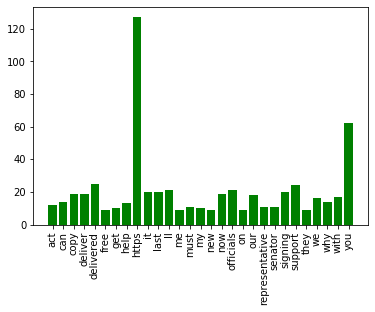

In [141]:
import numpy as np
import matplotlib.pyplot as plt


# for word_count in cv_fit.toarray().sum(axis=0)
#     frequency[]

x = vectorizer.get_feature_names()
y = cv_fit.toarray().sum(axis=0)

frequency = {}

common_list = "the", "and", "covid", "covid19", "ozns17am8r", "11", "19", "amp", "your", "are", "at", "be", "in", "if", "is", "or", "for", "to", "too", "of", "co", "text", "that", "this", "am", "by", "from", "have"

for i in range(len(x)): 
    if x[i] not in common_list and y[i] > 8:
        frequency[x[i]] = y[i]
#     print(x[i])

print(frequency)

plt.xticks(rotation=90)
plt.bar(frequency.keys(), frequency.values(), color='g')

# print(range(len(x)))

# plt.hist([x, y], label=[x, y])
# plt.legend(loc='upper right')
# plt.show()